## Base de données "taxis"


<h4 id="sommaire">Questions</h4>
<ol>
    <li><a href="#1">Charger le jeu de données "taxis" et afficher les 1eres données</a></li>
    <li><a href="#2">Changer les nom des colonnes et afficher</a></li>
    <li><a href="#3">Statistiques descriptives</a></li>
    <li><a href="#4">Vérifier les valeurs manquantes</a></li>
    <li><a href="#5">Distance moyenne parcourue par course</a></li>
    <li><a href="#6">Diagramme à barres de la distribution des passagers par course</a></li>
    <li><a href="#7">Comparaison du tarif moyen par type de paiement</a></li>
    <li><a href="#8">Visualisation de la distribution des distances parcourues</a></li>
    <li><a href="#9">Boîte à moustache des distances parcourues par nombre de passagers</a></li>
    <li><a href="#10">Statistiques des distances par nombre de passagers</a></li>
    <li><a href="#11">Tableau croisé du nombre de passagers et du type de paiement et visualisation</a></li>
    <li><a href="#12">Distribution des pourboires donnés</a></li>
    <li><a href="#13">Boîte à moustache des pourboires en fonction du type de paiement</a></li>
    <li><a href="#14">Diagramme en nuage de points de la distance parcourue en fonction du montant payé</a></li>
    <li><a href="#15">Corrélation entre les variables numériques</a></li>
    <li><a href="#16">Visualisation de la heatmap des corrélations</a></li>
</ol>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4 id="1">1. Charger le jeu de données "taxis" et afficher les 1eres données<a href="#sommaire">👆</a></h4>

In [2]:
#Dans la variable "df"
df = sns.load_dataset("taxis")
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


<h4 id="2">2. Remplacer les noms des colonnes et afficher le resultat<a href="#sommaire">👆</a></h4>

In [3]:
# remplacer les colonnes par :
# "pickup":"depart"
# "dropoff":"arrivee"
# "passengers":"nbpassagers"
# "fare":"tarif"
# "tip":"pourboire"
# "tolls":"peage"
# "color":"couleur"
# "pickup_zone":"zone_depart"
# "dropoff_zone":"zone_arrivee"
# "pickup_borough":"arrondissement_depart"
# "dropoff_borough":"arrondissement_arrivee"
df.rename(columns = {"pickup":"depart", "dropoff":"arrivee", "passengers":"nbpassagers", "fare":"tarif", "tip":"pourboire", "tolls":"peage", "color":"couleur", "pickup_zone":"zone_depart","dropoff_zone":"zone_arrivee", "pickup_borough":"arrondissement_depart","dropoff_borough":"arrondissement_arrivee"}, inplace=True)
df.head()

,depart,arrivee,nbpassagers,distance,tarif,pourboire,peage,total,couleur,payment,zone_depart,zone_arrivee,arrondissement_depart,arrondissement_arrivee
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


<h4 id="3">3. Statistique descriptive<a href="#sommaire">👆</a></h4>

In [4]:
df.describe()

,nbpassagers,distance,tarif,pourboire,peage,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


<h4 id="4">4. Valeurs manquantes<a href="#sommaire">👆</a></h4>

In [5]:
df.isnull().sum()

depart                     0
arrivee                    0
nbpassagers                0
distance                   0
tarif                      0
pourboire                  0
peage                      0
total                      0
couleur                    0
payment                   44
zone_depart               26
zone_arrivee              45
arrondissement_depart     26
arrondissement_arrivee    45
dtype: int64

<h4 id="5">5. Distance moyenne parcourue par course<a href="#sommaire">👆</a></h4>

In [6]:
# Calcul de la distance moyenne parcourue par course
df["distance"].mean()

3.024616819524328

<h4 id="6">6. Diagramme à barres de la distribution des passagers par course<a href="#sommaire">👆</a></h4>

In [7]:
# Nombre de passagers par course
df.groupby("nbpassagers")["nbpassagers"].sum()

nbpassagers
0       0
1    4678
2    1752
3     729
4     440
5    1385
6     918
Name: nbpassagers, dtype: int64

In [8]:
# Diagramme à barres du nombre de passagers par course
df["nbpassagers"].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       3
       ..
6428    1
6429    1
6430    1
6431    1
6432    1
Name: nbpassagers, Length: 6433, dtype: int64>

<Axes: xlabel='nbpassagers', ylabel='count'>

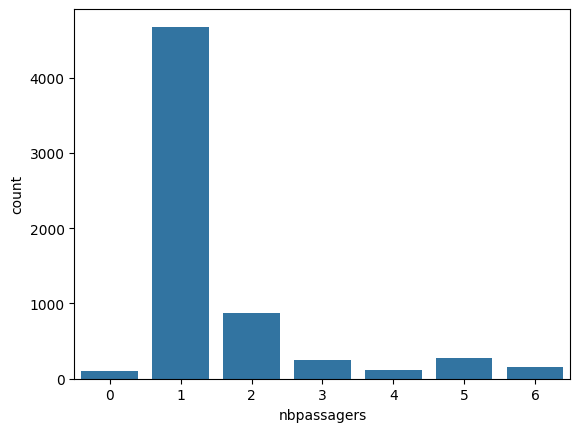

In [9]:
# Diagramme à barres du nombre de passagers par course
sns.countplot(data=df, x=df["nbpassagers"])

<h4 id="7">7. Comparaison du tarif moyen par type de paiement <a href="#sommaire">👆</a></h4>

In [10]:
# Calcul du tarif moyen par type de paiement
df.groupby("payment")["tarif"].mean()

payment
cash           11.592991
credit card    13.694750
Name: tarif, dtype: float64

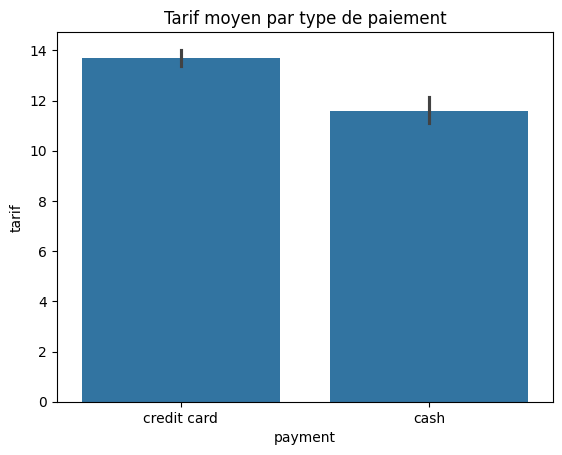

In [11]:
# Afficher le graphique du tarif moyen par type de paiement (barplot)
sns.barplot(x='payment', y='tarif', data=df)
plt.title('Tarif moyen par type de paiement')
plt.show()


<h4 id="8">8. Distribution des distances parcourues<a href="#sommaire">👆</a></h4>

<Axes: xlabel='distance', ylabel='Count'>

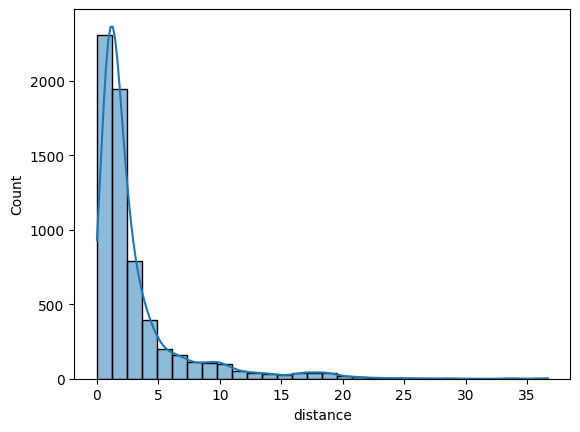

In [12]:
# Avec la courbe de densité (histplot)
sns.histplot(data=df, x="distance", bins=30, kde=True)

<h4 id="9">9. Distribution des distances parcourues par nombre de passagerd<a href="#sommaire">👆</a></h4>

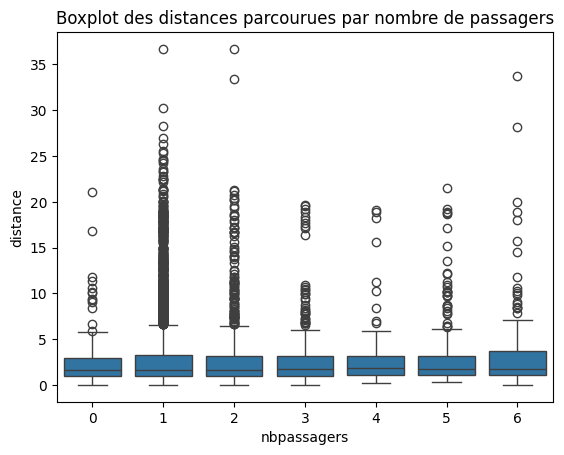

In [13]:
# Boîte à moustache des distances parcourues par nombre de passagers (boxplot)
sns.boxplot(x='nbpassagers', y='distance', data=df)
plt.title('Boxplot des distances parcourues par nombre de passagers')
plt.show()


<h4 id="10">10. Statistiques descriptive des distances parcourues par nombre de passagers<a href="#sommaire">👆</a></h4>

In [14]:
#Statistiques descriptive des distances parcourues par nombre de passagers
df.groupby("nbpassagers")["distance"].describe()

,count,mean,std,min,25%,50%,75%,max
nbpassagers,,,,,,,,
0,96.0,2.960417,3.590029,0.00,1.0000,1.600,2.9250,21.10
1,4678.0,3.019245,3.798981,0.00,0.9800,1.640,3.2275,36.66
2,876.0,2.978596,3.915500,0.00,0.9775,1.580,3.2000,36.70
3,243.0,3.135844,3.936812,0.00,0.9300,1.700,3.1050,19.62
4,110.0,2.936455,3.541079,0.20,1.1025,1.825,3.1675,19.16
5,277.0,2.964188,3.529105,0.28,1.0300,1.700,3.1100,21.51
6,153.0,3.488758,4.806399,0.00,1.0700,1.750,3.6900,33.76


<h4 id="11">11. Tableau croisé du nombre de passagers et du type de paiement<a href="#sommaire">👆</a></h4>

In [15]:
# Tableau croisé du nombre de passagers et du type de paiement
croise = pd.crosstab(df["nbpassagers"], df["payment"])
croise

payment,cash,credit card
nbpassagers,,
0,13,77
1,1312,3334
2,262,609
3,79,164
4,29,80
5,78,199
6,39,114


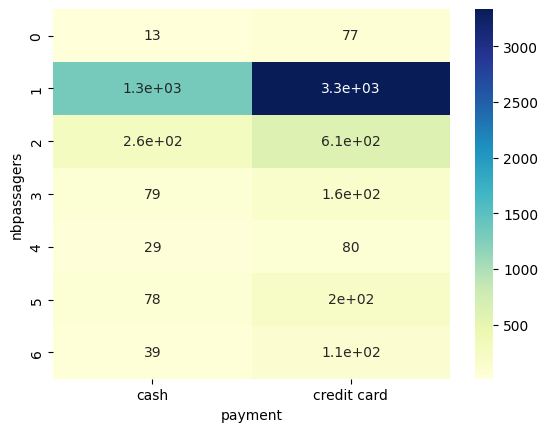

In [16]:
# Visualisation (heatmap avec les annotations)
sns.heatmap(croise, annot=True, cmap="YlGnBu")
plt.show()

<h4 id="12">12. Distribution des pourboires donnés<a href="#sommaire">👆</a></h4>

<Axes: xlabel='pourboire', ylabel='Count'>

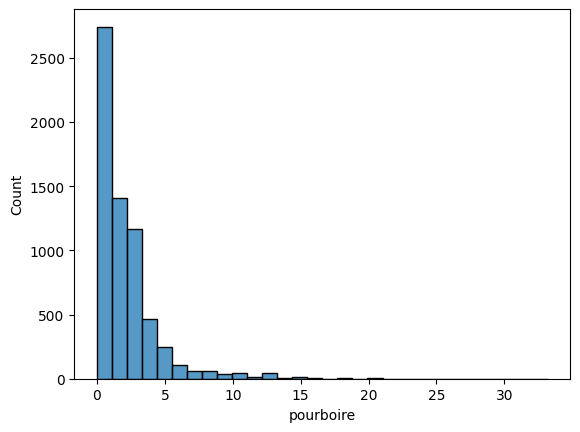

In [17]:
# Avec histplot
sns.histplot(data=df, x="pourboire", bins=30)

<h4 id="13">13. Boxplot des pourboires en fonction du type de paiement<a href="#sommaire">👆</a></h4>

In [18]:
# Calcul des pourboires en foncion du type de paiement
df.groupby("payment")["pourboire"].sum()

payment
cash               0.00
credit card    12732.32
Name: pourboire, dtype: float64

<Axes: xlabel='payment', ylabel='pourboire'>

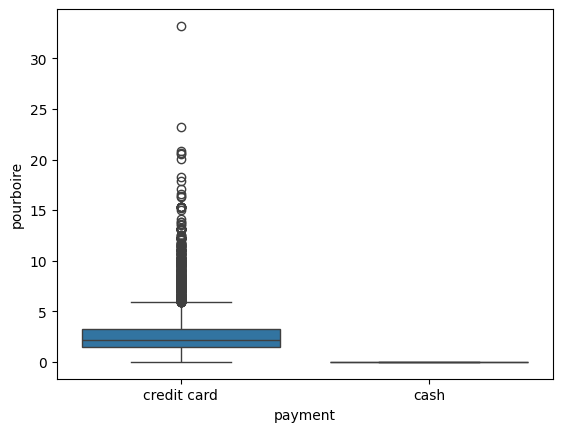

In [19]:
# Boîte à moustache des pourboires en foncion du type de paiement
sns.boxplot(data=df, x="payment", y="pourboire")

<h4 id="14">14. Diagramme en nuage de points de la distance parcourue en fonction du montant payé<a href="#sommaire">👆</a></h4>

<Axes: xlabel='distance', ylabel='total'>

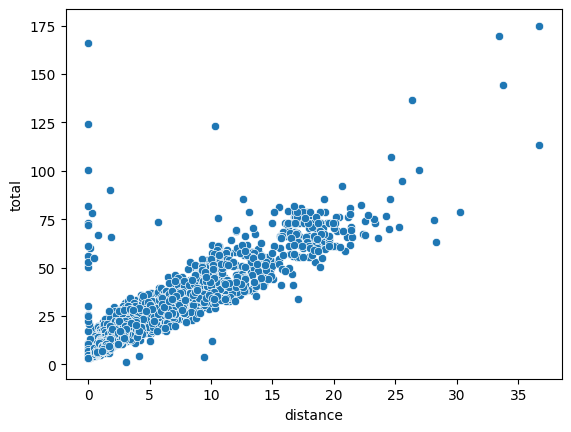

In [20]:
# Scatterplot
sns.scatterplot(data=df, x="distance", y="total")

<h4 id="15">15. Corrélation entre les variables numériques<a href="#sommaire">👆</a></h4>

In [21]:
#Avec df.corr
correlation = df.corr()
correlation

/var/folders/vl/h4rp5djj44n5c8xf_8dpk_8r0000gn/T/ipykernel_21691/1302972152.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,nbpassagers,distance,tarif,pourboire,peage,total
nbpassagers,1.000000,0.009411,0.007637,0.021099,-0.002903,0.015708
distance,0.009411,1.000000,0.920108,0.452589,0.635267,0.904676
tarif,0.007637,0.920108,1.000000,0.488612,0.609307,0.974358
pourboire,0.021099,0.452589,0.488612,1.000000,0.413619,0.646186
peage,-0.002903,0.635267,0.609307,0.413619,1.000000,0.683142
total,0.015708,0.904676,0.974358,0.646186,0.683142,1.000000


<h4 id="16">16. Visualisation de la heatmap des corrélations<a href="#sommaire">👆</a></h4>

<Axes: >

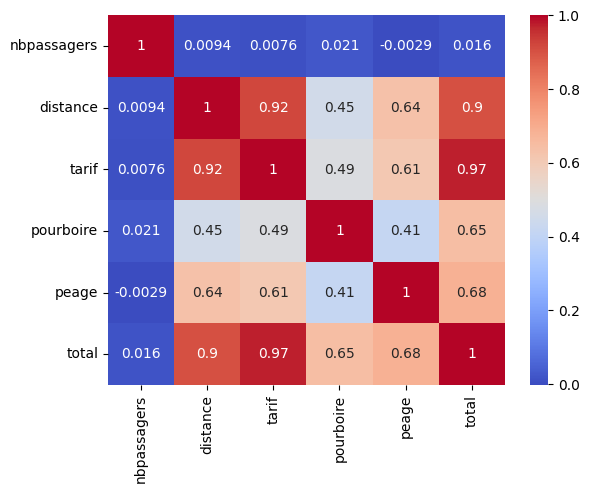

In [22]:
sns.heatmap(correlation, annot=True, cmap="coolwarm")